<a href="https://colab.research.google.com/github/edcalderin/SegmentAnythingModel-SAM/blob/master/Segment_anything.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trying SAM (Segment Anything Model)

Based on https://towardsdatascience.com/meta-ai-introduces-revolutionary-image-segmentation-model-trained-on-1-billion-masks-8f13c86a13a2

## Modules

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-d5u2v108
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-d5u2v108
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=bcf26ff2461b8d0fbc83dd3ae9b736ec6b771819565b4cc7927cf597f16d36ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-k21y9gg5/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
from pycocotools import mask as mask_utils

## Getting started

In [ ]:
# Downloading model checkpoint

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-04-20 21:02:53--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.165.83.35, 18.165.83.79, 18.165.83.91, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.165.83.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   224MB/s    in 12s     

2023-04-20 21:03:05 (206 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [ ]:
%%time
sam = sam_model_registry['vit_h'](checkpoint='sam_vit_h_4b8939.pth')
DEVICE = 'cuda'
sam.to(device=DEVICE) 

CPU times: user 5.63 s, sys: 3.63 s, total: 9.26 s
Wall time: 18.8 s


Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [ ]:
# To download an image
# !wget https://estaticos.elmundo.es/assets/multimedia/imagenes/2016/10/07/14758321979818.jpg

# Or using a local one
img = np.array(Image.open('IMG_3628.JPEG'))

In [ ]:
%%time
mask_generator = SamAutomaticMaskGenerator(sam)

masks = mask_generator.generate(img)

print('Total masks', len(masks))

Total masks 83
CPU times: user 6.89 s, sys: 205 ms, total: 7.1 s
Wall time: 8.61 s


## Plotting masks

In [ ]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

CPU times: user 1.78 s, sys: 603 ms, total: 2.38 s
Wall time: 2.38 s


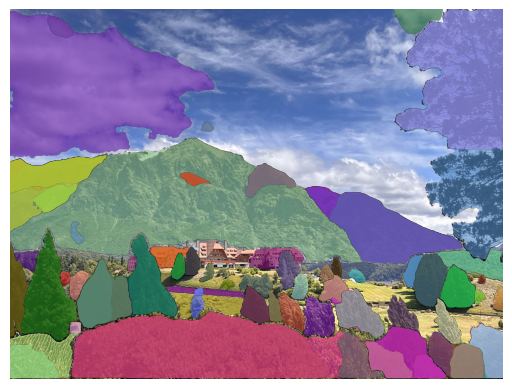

In [ ]:
%%time

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_axis_off()

for mask in masks[1:]:
    show_mask(mask.get('segmentation'), ax, random_color=True)